# **Sales Analysis using Python**

### **About Dataset**
The Dataset is called *'Superstore Dataset'*. This Dataset contains the sales of superstore in United States of America. This Dataset contains the summary of almost 10000 orders in the superstore. This dataset contains Order dates, ID's, region, city, etc.

Kaggle link for the Dataset - https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Checking the data

In [2]:
#Reading the CSV and checking the data
ss = pd.read_csv("Superstore.csv", encoding='windows-1252')
ss.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
ss.shape

(9994, 21)

In [4]:
ss.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Checking the null values

In [5]:
ss.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There is no null values in the dataset, so we begin to analyize the data

### Analyzing and Visualizing the dataset

In [6]:
ss.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
ss['Order Date'] = pd.to_datetime(ss['Order Date'])
ss['Ship Date'] = pd.to_datetime(ss['Ship Date'])

In [9]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [10]:
ss['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [11]:
ss['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [12]:
ss.sort_values(['Order Date'], inplace = True)

In [13]:
ss['Month Year'] = ss['Order Date'].apply(lambda x: x.strftime('%y-%m'))

In [14]:
ss['Month Year']

7980    14-01
739     14-01
740     14-01
741     14-01
1759    14-01
        ...  
5091    17-12
908     17-12
907     17-12
1296    17-12
906     17-12
Name: Month Year, Length: 9994, dtype: object

In [15]:
Monthly_trend = ss.groupby('Month Year').sum()['Sales'].reset_index()

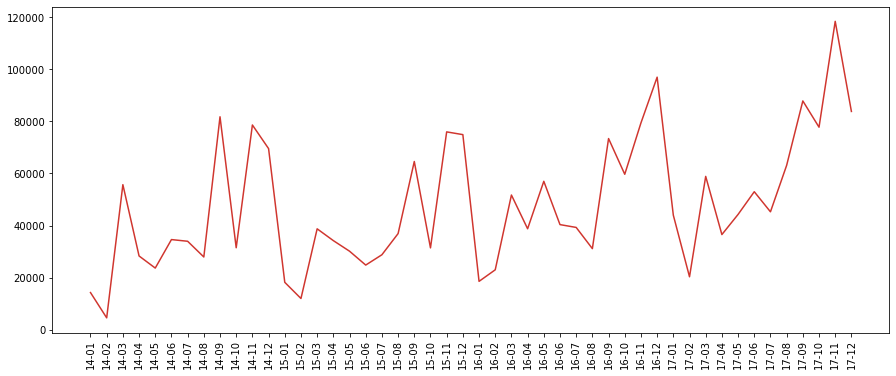

In [16]:
plt.figure(figsize = (15,6))
plt.plot(Monthly_trend['Month Year'], Monthly_trend['Sales'], color = '#D0362F')
plt.xticks(rotation = 'vertical')
plt.show()

We can see that the sales in first two months of the year 2014 were very low but in 3rd month the sales went upto 60,000. Further the sales went to 80,000 in  8th month of 2014. The sales saw a downfall in the 2nd month of 2015, 1st month of 2016 and 2nd month of 2017. We can also observe that sales saw a downfall in first quater of every four year. The sales topped the chart in 11th Month of 2017 with total sales around 120,000

In [17]:
df = pd.DataFrame(ss.groupby('Sub-Category').sum()['Sales'])
Sub_Sales = df.sort_values('Sales', ascending = False)

In [18]:
Sub_Sales[:10]

,Sales
Sub-Category,
Phones,330007.0540
Chairs,328449.1030
Storage,223843.6080
Tables,206965.5320
Binders,203412.7330
Machines,189238.6310
Accessories,167380.3180
Copiers,149528.0300
Bookcases,114879.9963


In [19]:
df = pd.DataFrame(ss.groupby('Sub-Category').sum()['Quantity'])
Sub_quan = df.sort_values('Quantity', ascending = False)

In [20]:
Sub_quan[:10]

,Quantity
Sub-Category,
Binders,5974
Paper,5178
Furnishings,3563
Phones,3289
Storage,3158
Art,3000
Accessories,2976
Chairs,2356
Appliances,1729


In [21]:
df = pd.DataFrame(ss.groupby('Sub-Category').sum()['Profit'])
Sub_pro = df.sort_values('Profit', ascending = False)

In [22]:
Sub_pro.head(10)

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


We can see the Phone topped the chart in Sales Category and is in top 5 Sales in Quantity and 2nd in making Profit. Though chair sales is on 2nd rank in Sales but the profit on chair is comparatively low as compared to its sales. Copiers are 8th in Sales and not even in top 10 in Sales as per quantity but is still on the top in Profit. Envelopes has made their place in  top 10 profitable items too.

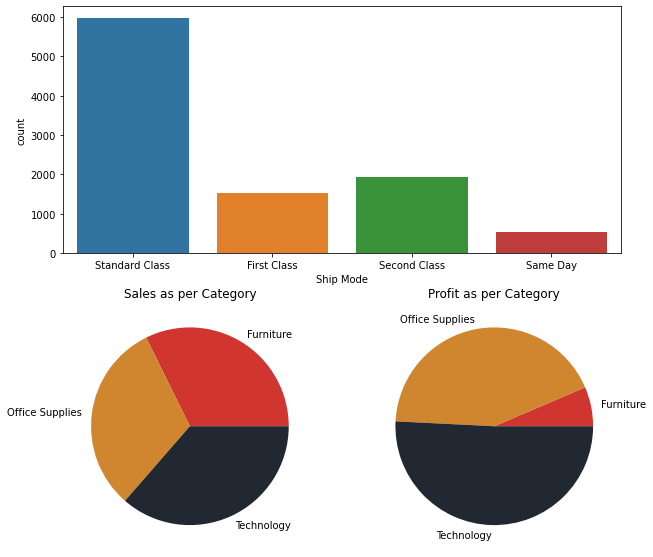

In [23]:
plt.figure(figsize=[10,10])

#Making Stack Bar Chart
ss_stack = ss[['Profit', 'Sales', 'Ship Mode']]
ss_stackbar = ss_stack.groupby(['Ship Mode']).sum().reset_index()

plt.subplot(2,1,1)
sns.countplot(ss_stack['Ship Mode'])

#Making Pie Diagran
ss_data = ss[['Category','Sales','Profit']]
ss_dia = ss_data.groupby(['Category']).sum().reset_index()

plt.subplot(2,2,3)
plt.pie(ss_dia['Sales'], labels=ss_dia['Category'], colors=['#D0362F','#D0862F','#222831'])
plt.title("Sales as per Category")

plt.subplot(2,2,4)
plt.pie(ss_dia['Profit'], labels=ss_dia['Category'], colors=['#D0362F','#D0862F','#222831'])
plt.title("Profit as per Category")

plt.show()

From the first figure, we can assume that consumers mostly prefer Standard Class delivery mode. Also from next two figure we can identify that the sales is almost same for every category i.e for Office supplies, Furniture and Technology but thry vary in their profits. Technology is the most profitable category followed by office supplies.

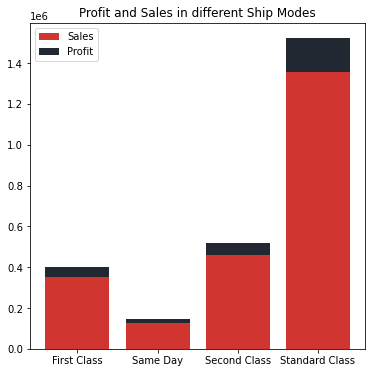

In [24]:
plt.figure(figsize=(6,6))
plt.bar(x = ss_stackbar['Ship Mode'], height = ss_stackbar['Sales'], color = '#D0362F')
plt.bar(x = ss_stackbar['Ship Mode'], height = ss_stackbar['Profit'], bottom = ss_stackbar['Sales'], color = '#222831')
plt.title("Profit and Sales in different Ship Modes")
plt.legend(['Sales','Profit'])
plt.show()

As we know the most preffered shipmode was Standard Class and now we can see that this is the most profitable mode. The least preffered mode is the Same day Shipment and also this shipment is the least profitable mode.

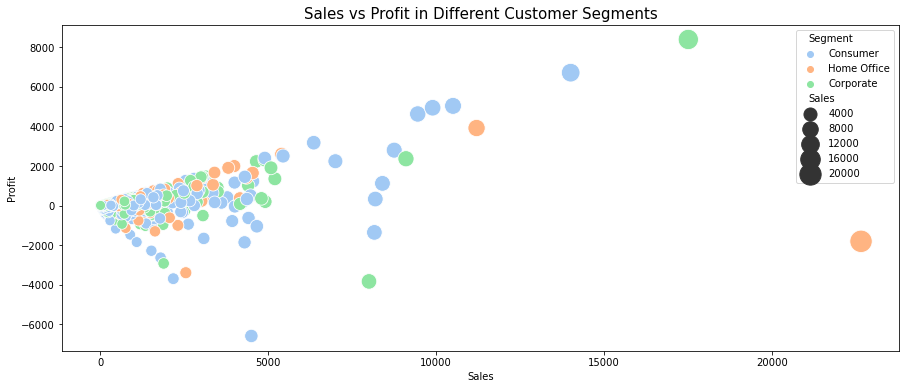

In [25]:
plt.figure(figsize=[15,6])
sns.scatterplot(x=ss['Sales'], y=ss['Profit'], hue=ss['Segment'], palette='pastel', size=ss["Sales"], sizes=(100,500), legend='auto') 
plt.title("Sales vs Profit in Different Customer Segments", size=15)
plt.show()

This diagram shows the scatterplot of Sales vs Profit in Different Customer Segments. We can clearly see that the Consumer segment is clearly dominating the Sales as well as the Profit section followed by Corporate and Home Offices respectively.

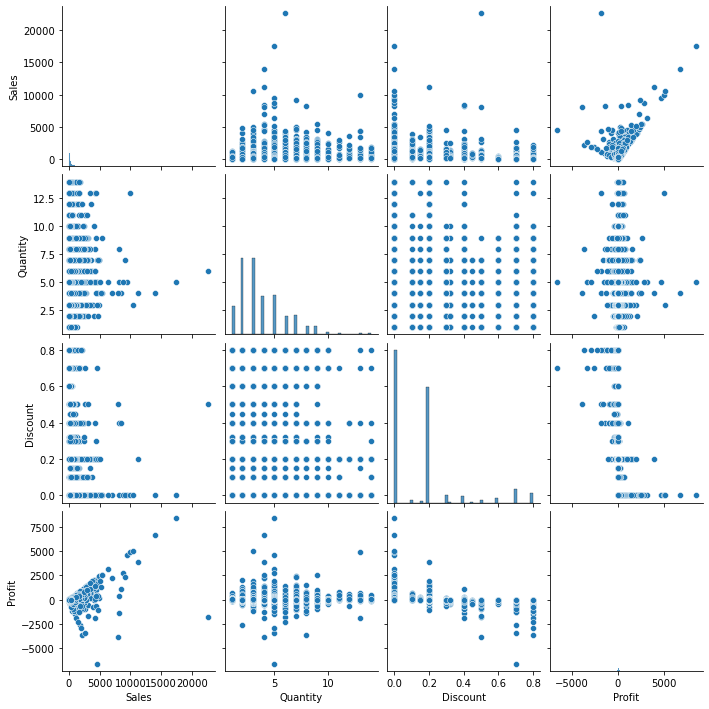

In [26]:
drop_ss = ss.drop(['Row ID', 'Postal Code'], axis = 1)
sns.pairplot(drop_ss)
plt.show()

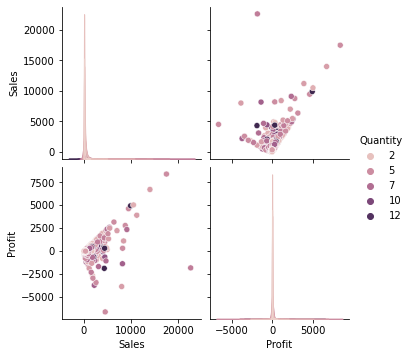

In [27]:
sns.pairplot(ss[['Sales', 'Profit', 'Quantity']], hue ="Quantity", diag_kind="kde")
plt.show()

This pairplot explains us the relation between Sales and Profi with respect to Quantity.

Text(0.5, 1.0, 'Sales as per Category in Region')

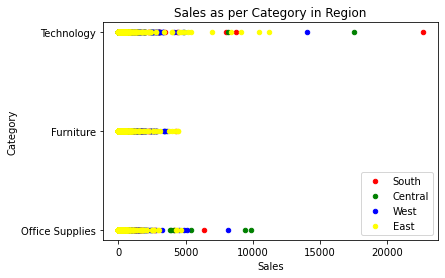

In [28]:
ax = ss[ss.Region == 'South'].plot.scatter(x = 'Sales', y = 'Category', color = 'red', label = 'South')
ss[ss.Region == 'Central'].plot.scatter(x = 'Sales', y = 'Category', color = 'green', label = 'Central', ax = ax)
ss[ss.Region == 'West'].plot.scatter(x = 'Sales', y = 'Category', color = 'blue', label = 'West', ax = ax)
ss[ss.Region == 'East'].plot.scatter(x = 'Sales', y = 'Category', color = 'Yellow', label = 'East', ax = ax)
ax.set_title('Sales as per Category in Region')

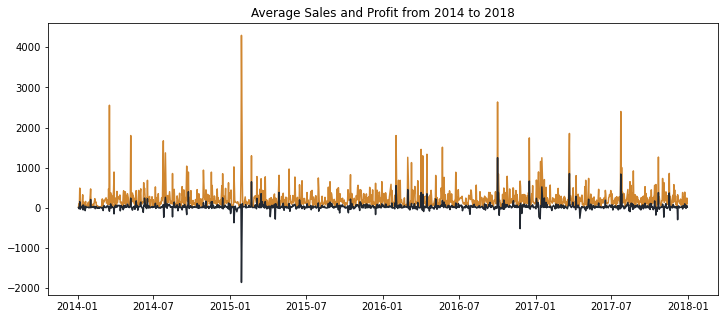

In [29]:
plt.figure(figsize=[12,5])
ss_line = ss[['Order Date','Sales','Profit']].sort_values('Order Date')
ss_line = ss_line.groupby('Order Date').mean()

plt.plot(ss_line.index, 'Sales', data=ss_line, color='#D0862F') 
plt.plot(ss_line.index, 'Profit', data=ss_line, color='#222831')
plt.title("Average Sales and Profit from 2014 to 2018")

plt.show()